In [50]:
# Importing necessary libraries
import pandas as pd #data Maipulation
import numpy as np #numerical calculation
import matplotlib.pyplot as plt #Data Visulaisation
import seaborn as sns #statistical Visulisation
from sklearn.model_selection import train_test_split #splitting data for model training and testing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [51]:
# Load the dataset
Credit_risk_analysis = pd.read_csv('credit_risk_dataset.csv')

In [52]:
Credit_risk_analysis.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [53]:
Credit_risk_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [54]:
Credit_risk_analysis['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [ ]:
Credit_risk_analysis['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [ ]:
Credit_risk_analysis['loan_grade'].unique()

array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

In [55]:
Credit_risk_analysis['cb_person_default_on_file'].unique()

array(['Y', 'N'], dtype=object)

In [56]:
# Encoding  categorical features using MAP function and assigning the Categorical features with Numerical Values
Credit_risk_analysis['person_home_ownership'] = Credit_risk_analysis['person_home_ownership'].map({'RENT': 0, 'MORTGAGE': 1, 'OWN': 2, 'OTHER': 3})
Credit_risk_analysis['loan_intent'] = Credit_risk_analysis['loan_intent'].map({'PERSONAL': 0, 'EDUCATION': 1, 'MEDICAL': 2, 'VENTURE': 3,'HOMEIMPROVEMENTS': 4,'DEBTCONSOLIDATION':5})
Credit_risk_analysis['loan_grade'] = Credit_risk_analysis['loan_grade'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6})
Credit_risk_analysis['cb_person_default_on_file'] = Credit_risk_analysis['cb_person_default_on_file'].map({'Y': 1, 'N': 0})

In [57]:
Credit_risk_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  int64  
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 28976 non-null  float64
 5   loan_grade                  32581 non-null  int64  
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  int64  
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 3.0 MB


In [58]:
#Finding Missing Values
Credit_risk_analysis.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,3605
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [59]:
# Fill missing values for 'person_emp_length','loan_int_rate' with the median
Credit_risk_analysis['person_emp_length'] = Credit_risk_analysis['person_emp_length'].fillna(Credit_risk_analysis['person_emp_length'].median())
Credit_risk_analysis['loan_int_rate'] = Credit_risk_analysis['loan_int_rate'].fillna(Credit_risk_analysis['loan_int_rate'].median())
Credit_risk_analysis['loan_intent'] = Credit_risk_analysis['loan_intent'].fillna(Credit_risk_analysis['loan_intent'].mode()[0])
print(Credit_risk_analysis.isnull().sum())

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [60]:
Credit_risk_analysis.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [61]:
# Exploratory Data Analysis
print(Credit_risk_analysis.describe())

         person_age  person_income  person_home_ownership  person_emp_length  \
count  32581.000000   3.258100e+04           32581.000000       32581.000000   
mean      27.734600   6.607485e+04               0.581106           4.767994   
std        6.348078   6.198312e+04               0.649430           4.087372   
min       20.000000   4.000000e+03               0.000000           0.000000   
25%       23.000000   3.850000e+04               0.000000           2.000000   
50%       26.000000   5.500000e+04               0.000000           4.000000   
75%       30.000000   7.920000e+04               1.000000           7.000000   
max      144.000000   6.000000e+06               3.000000         123.000000   

        loan_intent    loan_grade     loan_amnt  loan_int_rate   loan_status  \
count  32581.000000  32581.000000  32581.000000   32581.000000  32581.000000   
mean       2.007827      1.218195   9589.371106      11.009620      0.218164   
std        1.613013      1.166336   632

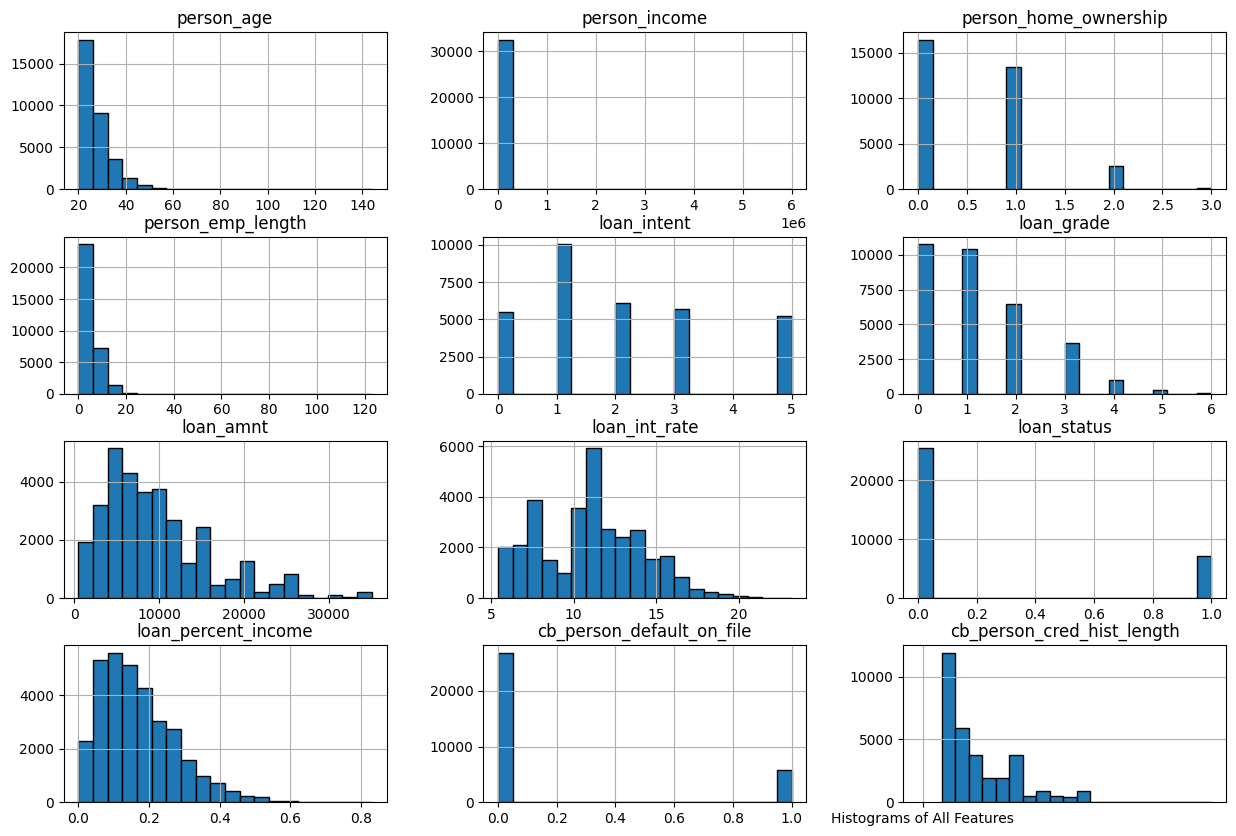

In [62]:
# Ploting histograms for all features
Credit_risk_analysis.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.hist("Histograms of All Features")
plt.show()

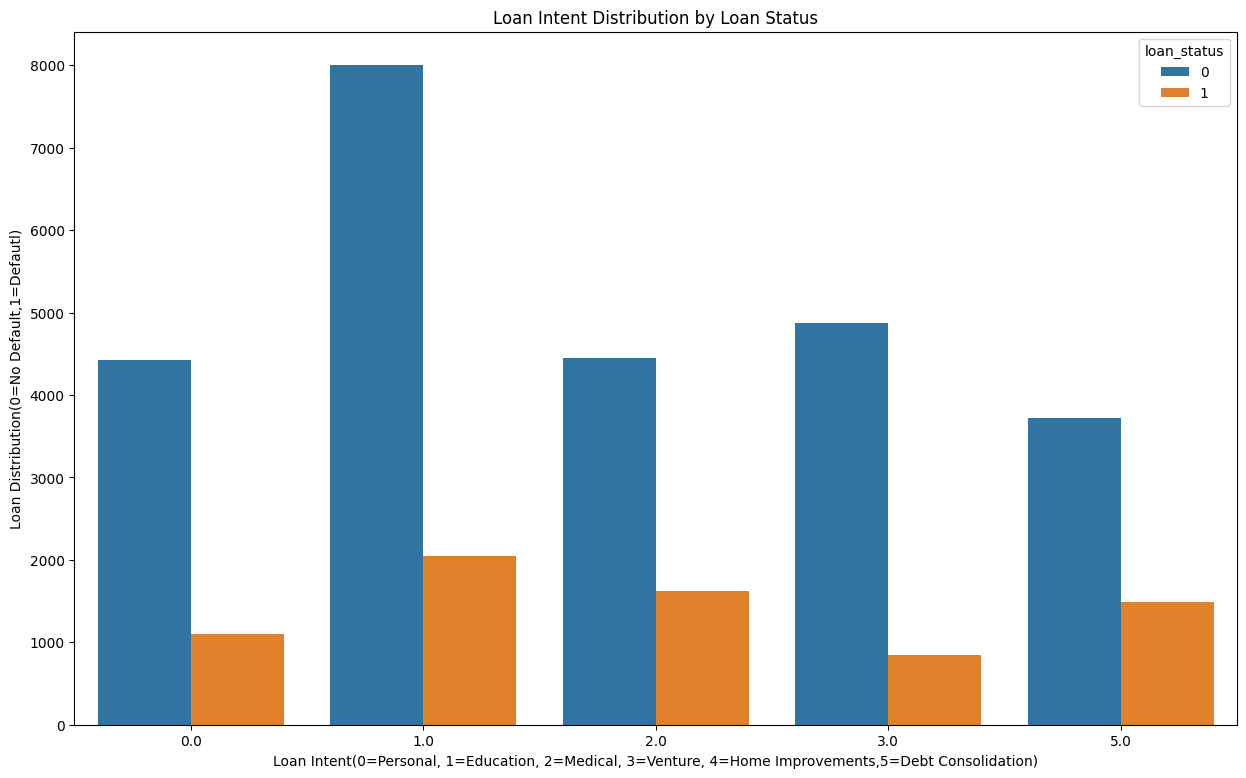

In [63]:
# Distribution of loan amounts grouped by loan intent
plt.figure(figsize=(15,9))
sns.countplot(data = Credit_risk_analysis, x = 'loan_intent', hue = 'loan_status')
plt.title("Loan Intent Distribution by Loan Status")
plt.xlabel("Loan Intent(0=Personal, 1=Education, 2=Medical, 3=Venture, 4=Home Improvements,5=Debt Consolidation)")
plt.ylabel("Loan Distribution(0=No Default,1=Defautl)")
plt.show()


In [64]:
#histogram for loan_status (0 = No Default, 1 = Default)
import plotly.express as px
fig2 = px.histogram(
    Credit_risk_analysis,
    x="loan_grade",
    color="loan_status",
    title="Loan Grade Distribution by Loan Status",
    labels={
        "loan_grade": "Loan Grade (Encoded)",
        "loan_status": "Loan Status (0=No Default, 1=Default)"
    },
    barmode="group"
)
fig2.update_layout(
    legend_title="Loan Status",
    title=dict(x=0.5),  # Center align title
    xaxis_title="Loan Grade",
    yaxis_title="Loan Distribution"
)
fig2.show()

In [65]:
fig3 = px.box(
    Credit_risk_analysis,
    x="loan_intent",
    y="loan_amnt",
    color="loan_status",
    title="Loan Amount Distribution by Loan Intent and Loan Status",
    labels={
        "loan_intent": "Loan Intent (Encoded)",
        "loan_amnt": "Loan Amount",
        "loan_status": "Loan Status (0=No Default, 1=Default)"
    }
)
fig3.update_layout(
    legend_title="Loan Status",
    title=dict(x=0.5),  # Center align title
    xaxis_title="Loan Intent",
    yaxis_title="Loan Amount"
)
fig3.show()

In [66]:
fig4 = px.scatter(Credit_risk_analysis, x='loan_amnt', y='loan_int_rate', color='loan_status') # Specify x and y columns
fig4.update_layout(
    legend_title="Loan Status",
    title=dict(x=0.5),  # Center align title
    xaxis_title="Loan Amount",
    yaxis_title="Loan Interest Rate"
)
fig4.show()

In [68]:
#clipping outliers to the 25th and 75th percentiles
for column in continuous_columns:
    Q1 = Credit_risk_analysis[column].quantile(0.25)
    Q3 = Credit_risk_analysis[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    Credit_risk_analysis[column] = np.clip(Credit_risk_analysis[column], lower_bound, upper_bound)

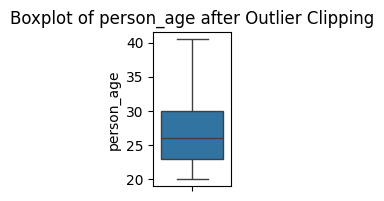

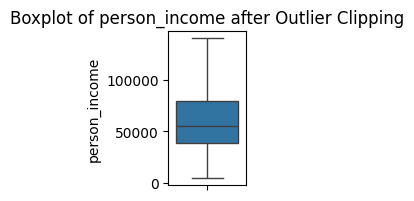

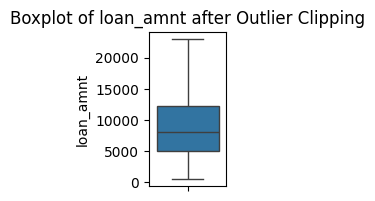

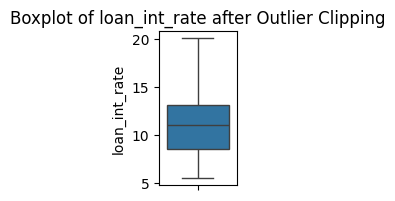

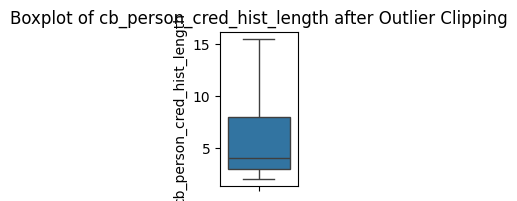

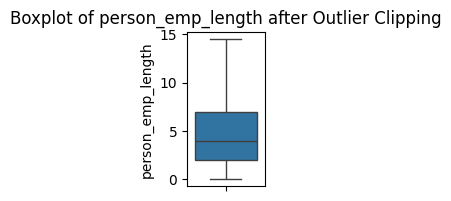

In [69]:
for column in continuous_columns:
    plt.figure(figsize=(1,2), edgecolor='black')
    sns.boxplot(Credit_risk_analysis[column])
    plt.title(f"Boxplot of {column} after Outlier Clipping")
    plt.show()

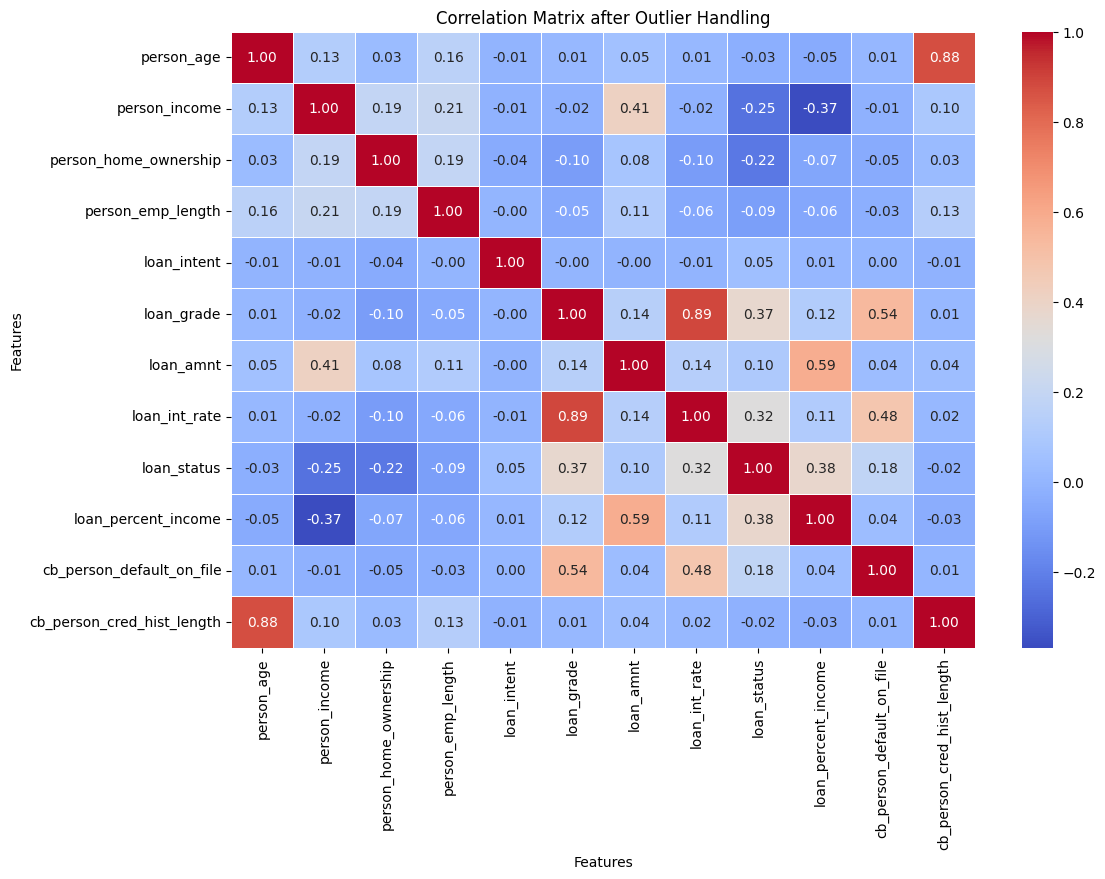

In [70]:
# Compute and visualize the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = Credit_risk_analysis.corr()
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Matrix after Outlier Handling")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

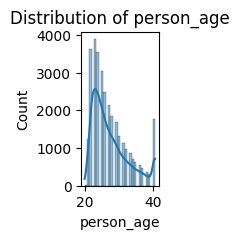

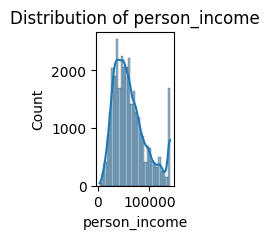

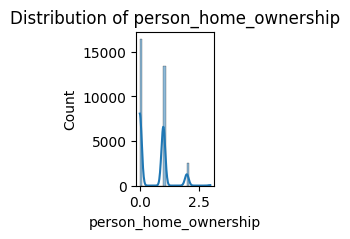

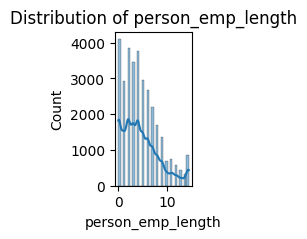

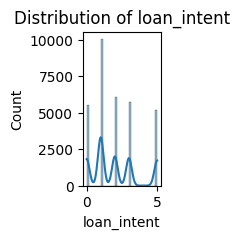

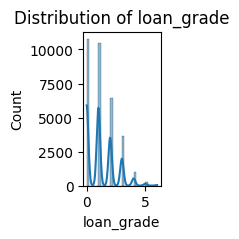

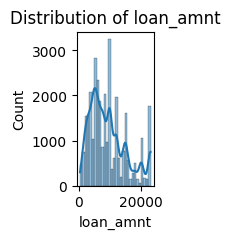

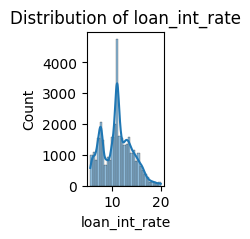

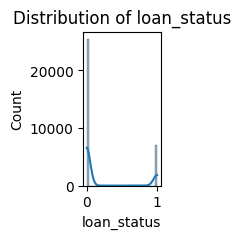

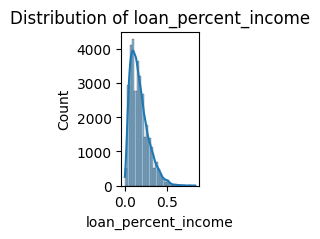

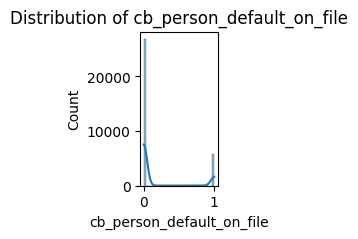

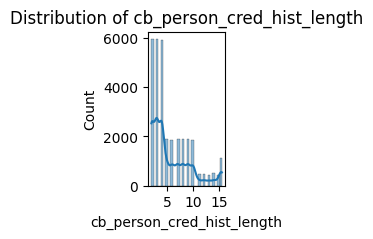

In [71]:

for feature in Credit_risk_analysis:
    plt.figure(figsize=(1, 2))
    sns.histplot(Credit_risk_analysis[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
    plt.show()


In [72]:
# Define feature set (X) and target variable (y)
X = Credit_risk_analysis.drop(['loan_status'], axis=1)  # Drop target columns from features
# Changed: Pass a list of column names ['loan_status', 'loan_grade'] instead of a tuple within a list.
y = Credit_risk_analysis['loan_status']  # Target variable

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
from sklearn.preprocessing import StandardScaler

# Define continuous columns
continuous_columns = [ 'person_age','person_income', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length', 'person_emp_length']

# Apply StandardScaler to continuous features
scaler = StandardScaler()
X_train[continuous_columns] = scaler.fit_transform(X_train[continuous_columns])
X_test[continuous_columns] = scaler.transform(X_test[continuous_columns])

In [74]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC calculation

In [75]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# ROC-AUC Score
# Get probabilities for the positive class only
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate ROC-AUC for binary classification
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"ROC-AUC Score: {roc_auc:.2f}")

Accuracy: 84.58%
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      5072
           1       0.74      0.47      0.58      1445

    accuracy                           0.85      6517
   macro avg       0.80      0.71      0.74      6517
weighted avg       0.84      0.85      0.83      6517

Confusion Matrix:
[[4830  242]
 [ 763  682]]
ROC-AUC Score: 0.85


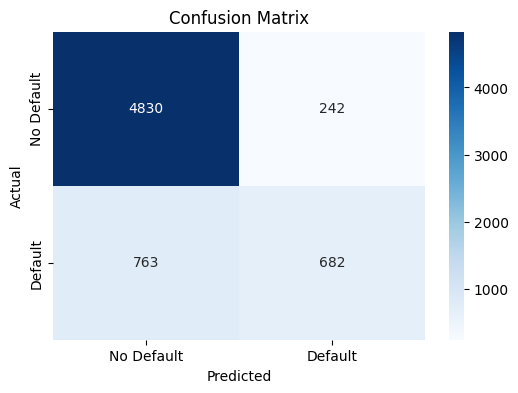

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




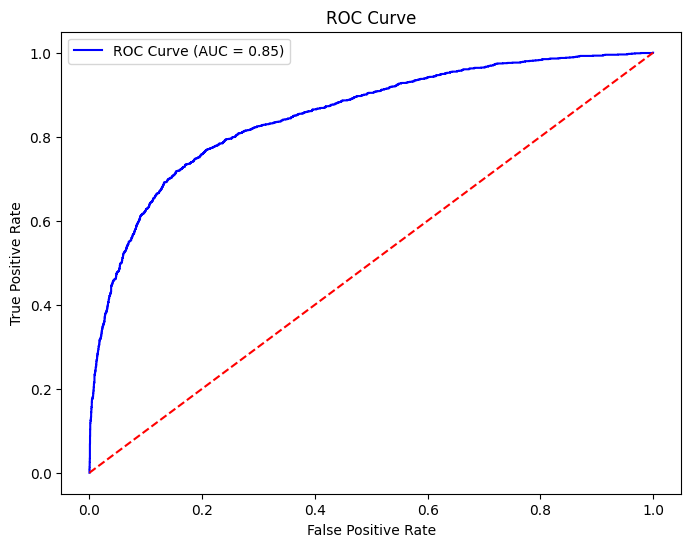

In [77]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="red")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [80]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
logistic_model = model

# Define new customer data with correct column names from X_train
new_customer = pd.DataFrame([{
    'person_age': 42,
    'person_income': 96000,
    'person_home_ownership': 0,
    'person_emp_length': 5.0,
    'loan_intent': 0,
    'loan_grade': 1,
    'loan_amnt': 1000.0,
    'loan_int_rate': 11.14,
    'cb_person_default_on_file': 1,
    'cb_person_cred_hist_length': 3,
    'loan_percent_income': 0.1
}])
# Reorder columns in new_customer to match X_train
new_customer = new_customer[X_train.columns]
# Normalize continuous features
continuous_columns = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length', 'person_emp_length']
new_customer[continuous_columns] = scaler.transform(new_customer[continuous_columns])

# Make predictions
new_prediction = logistic_model.predict(new_customer)
new_prediction_prob = logistic_model.predict_proba(new_customer)[:, 1]

# Display results
print(f"Will the customer default? {'Yes' if new_prediction[0] == 1 else 'No'}")
print(f"Probability of Default: {new_prediction_prob[0] * 100:.2f}%")


Will the customer default? No
Probability of Default: 11.67%


In [79]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
# Assuming 'model' holds your trained Logistic Regression model from previous cells:
logistic_model = model

# Define new customer data with correct column names from X_train
new_customer = pd.DataFrame([{
    'person_age': 22,
    'person_income': 59000,
    'person_home_ownership': 0,
    'person_emp_length': 123.0,
    'loan_intent': 0,
    'loan_grade': 3,
    'loan_amnt': 35000.0,
    'loan_int_rate': 16.02,
    'cb_person_default_on_file': 1,
    'cb_person_cred_hist_length': 3,
    'loan_percent_income': 0.59
}])
# Reorder columns in new_customer to match X_train
new_customer = new_customer[X_train.columns]
# Normalize continuous features
continuous_columns = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length', 'person_emp_length']
new_customer[continuous_columns] = scaler.transform(new_customer[continuous_columns])

# Make predictions
new_prediction = logistic_model.predict(new_customer)
new_prediction_prob = logistic_model.predict_proba(new_customer)[:, 1]

# Display results
print(f"Will the customer default? {'Yes' if new_prediction[0] == 1 else 'No'}")
print(f"Probability of Default: {new_prediction_prob[0] * 100:.2f}%")


Will the customer default? Yes
Probability of Default: 88.38%


In [81]:
import joblib
joblib.dump(model, 'Credit_risk_analysis_model')


['Credit_risk_analysis_model']

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import os
import joblib  # To load the trained model and scaler

# Load your trained model and scaler
# model_path = os.path.join(os.path.dirname(__file__), 'Credit_risk_analysis_model')  # __file__ is not defined in Streamlit
# Use a relative path assuming the model is in the same directory as the script
model_path = 'Credit_risk_analysis_model'
model = joblib.load(model_path)


# App title
st.title("Credit Default Prediction App")
st.write("""
This app predicts whether a customer is likely to default on their loan based on their financial and loan-related information.
""")

# Sidebar for user input
st.sidebar.header("Enter Customer Details")

# Input fields
person_age = st.sidebar.number_input("Age", min_value=18, max_value=100, value=30, step=1)
person_income = st.sidebar.number_input("Income", min_value=0, max_value=1_000_000, value=50_000, step=1_000)
person_home_ownership = st.sidebar.selectbox("Home Ownership", options=["RENT", "MORTGAGE", "OWN", "OTHER"])
person_emp_length = st.sidebar.number_input("Employment Length (years)", min_value=0.0, max_value=50.0, value=5.0, step=0.1)
loan_intent = st.sidebar.selectbox("Loan Intent", options=["PERSONAL", "EDUCATION", "MEDICAL", "VENTURE", "DEBTCONSOLIDATION"])
loan_grade = st.sidebar.selectbox("Loan Grade", options=["A", "B", "C", "D", "E", "F", "G"])
loan_amnt = st.sidebar.number_input("Loan Amount", min_value=0.0, max_value=100_000.0, value=10_000.0, step=100.0)
loan_int_rate = st.sidebar.number_input("Interest Rate (%)", min_value=0.0, max_value=100.0, value=10.0, step=0.1)
loan_percent_income = st.sidebar.number_input("Loan to Income Ratio", min_value=0.0, max_value=1.0, value=0.1, step=0.01)
cb_person_default_on_file = st.sidebar.selectbox("Previous Default on File", options=["Yes", "No"])
cb_person_cred_hist_length = st.sidebar.number_input("Credit History Length (years)", min_value=0, max_value=50, value=10, step=1)

# Encode categorical features
home_ownership_map = {"RENT": 0, "MORTGAGE": 1, "OWN": 2, "OTHER": 3}
loan_intent_map = {"PERSONAL": 0, "EDUCATION": 1, "MEDICAL": 2, "VENTURE": 3, "DEBTCONSOLIDATION": 4}
loan_grade_map = {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6}
default_on_file_map = {"Yes": 1, "No": 0}

# Prepare data for prediction
input_data = pd.DataFrame([{
    'person_age': person_age,
    'person_income': person_income,
    'person_home_ownership': home_ownership_map[person_home_ownership],
    'person_emp_length': person_emp_length,
    'loan_intent': loan_intent_map[loan_intent],
    'loan_grade': loan_grade_map[loan_grade],
    'loan_amnt': loan_amnt,
    'loan_int_rate': loan_int_rate,
    'loan_percent_income': loan_percent_income,
    'cb_person_default_on_file': default_on_file_map[cb_person_default_on_file],
    'cb_person_cred_hist_length': cb_person_cred_hist_length
}])
# Display user inputs
st.subheader("Customer Details")
st.write(input_data)

# Predict default
if st.button("Predict Default"):
    prediction = model.predict(input_data)
    prediction_prob = model.predict_proba(input_data)[:, 1]

    if prediction[0] == 1:
        st.error(f"The customer is likely to default! (Probability: {prediction_prob[0] * 100:.2f}%)")
    else:
        st.success(f"The customer is unlikely to default. (Probability: {prediction_prob[0] * 100:.2f}%)")

2025-01-24 00:04:41.114 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-24 00:04:41.233 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-01-24 00:04:41.236 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-24 00:04:41.238 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-24 00:04:41.243 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-24 00:04:41.245 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-24 00:04:41.246 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-24 00:04:41.247 Thread 'MainThread': mi

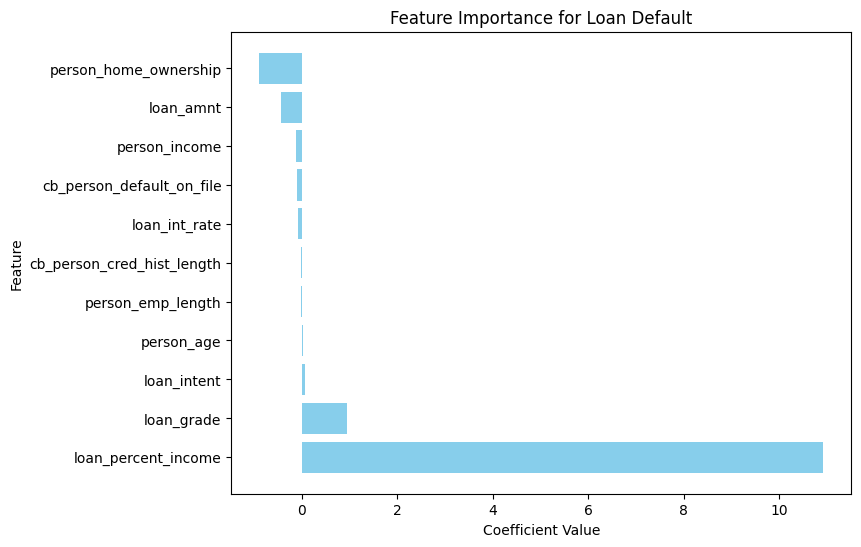

In [ ]:
#Question 1: What Factors Contribute to Loan Default?
import matplotlib.pyplot as plt
import pandas as pd

# Extract feature importance (coefficients for Logistic Regression)
feature_importance = pd.DataFrame({
    'Feature': model.feature_names_in_,
    'Importance': model.coef_[0]
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(8, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.title('Feature Importance for Loan Default')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

LTV_bin
0-20%      0.131920
20-40%     0.366525
40-60%     0.754420
60-80%     0.804878
80-100%    0.000000
Name: loan_status, dtype: float64


<ipython-input-48-0ae83ddb9a9d>:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



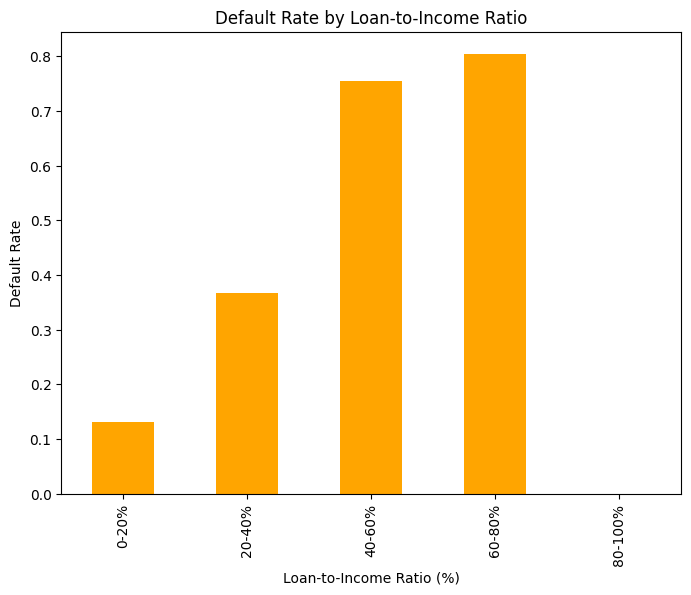

In [ ]:
#Question 2: What Is the Ideal Loan-to-Value (LTV) Ratio for Reducing Risk Across Customer Segments?
# Group data by loan_percent_income and loan_status
Credit_risk_analysis['loan_percent_income'] = Credit_risk_analysis['loan_amnt'] / Credit_risk_analysis['person_income']

# Bin loan_percent_income into ranges
Credit_risk_analysis['LTV_bin'] = pd.cut(
    Credit_risk_analysis['loan_percent_income'],
    bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
    labels=['0-20%', '20-40%', '40-60%','60-80%','80-100%']
)

# Calculate default rate by LTV bin
ltv_default_rate = Credit_risk_analysis.groupby('LTV_bin')['loan_status'].mean()
print(ltv_default_rate)

plt.figure(figsize=(8, 6))
ltv_default_rate.plot(kind='bar', color='orange')
plt.title('Default Rate by Loan-to-Income Ratio')
plt.xlabel('Loan-to-Income Ratio (%)')
plt.ylabel('Default Rate')
plt.show()

:

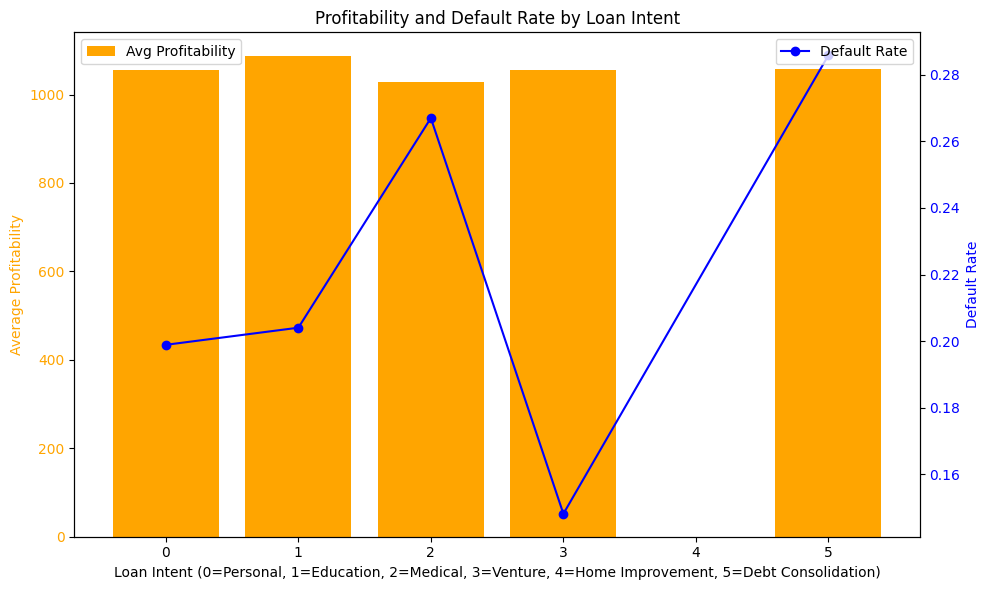

In [ ]:
#Q3: How to maximiye profitabilty while managing Risks
import matplotlib.pyplot as plt
import pandas as pd

# Calculate loan profitability (interest rate multiplied by loan amount)
Credit_risk_analysis['loan_profitability'] = Credit_risk_analysis['loan_amnt'] * (Credit_risk_analysis['loan_int_rate'] / 100)


# Grouping by 'loan_intent' to calculate average profitability and default rate
loan_intent_analysis = Credit_risk_analysis.groupby('loan_intent')[['loan_profitability', 'loan_status']].agg(
    avg_profitability=('loan_profitability', 'mean'),
    default_rate=('loan_status', 'mean')
)

# Plotting the graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for average profitability
ax1.bar(loan_intent_analysis.index, loan_intent_analysis['avg_profitability'], color='orange', label='Avg Profitability')
ax1.set_xlabel('Loan Intent (0=Personal, 1=Education, 2=Medical, 3=Venture, 4=Home Improvement, 5=Debt Consolidation)')
ax1.set_ylabel('Average Profitability', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')
ax1.set_title('Profitability and Default Rate by Loan Intent')

# Line plot for default rate on a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(loan_intent_analysis.index, loan_intent_analysis['default_rate'], color='blue', label='Default Rate', marker='o')
ax2.set_ylabel('Default Rate', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()
